# Data preprocessing

# import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
pwd

'C:\\Users\\Rajalakshmi'

In [3]:
data = pd.read_excel(r"C:\Raji\Dataset\Crude Oil Prices Daily.xlsx")

In [4]:
data.head(20)

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
5,1986-01-09,26.03
6,1986-01-10,25.65
7,1986-01-13,25.08
8,1986-01-14,24.97
9,1986-01-15,25.18


In [5]:
data.tail(15)

,Date,Closing Value
8208,2018-06-19,65.09
8209,2018-06-20,65.92
8210,2018-06-21,65.68
8211,2018-06-22,69.02
8212,2018-06-25,69.91
8213,2018-06-26,75.23
8214,2018-06-27,77.41
8215,2018-06-28,73.45
8216,2018-06-29,74.13
8217,2018-07-02,73.89


# Handling the Missing Values

In [6]:
data.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [7]:
data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [8]:
data['Date'].mean()

Timestamp('2002-04-05 22:11:15.082086912')

In [9]:
data['Closing Value'].median()

29.61

In [10]:
data['Closing Value'].mode()

0    18.63
1    20.38
Name: Closing Value, dtype: float64

In [11]:
data['Date'].fillna(data['Date'].mean(),inplace=True)

In [12]:
data

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
8218,2018-07-03,74.19
8219,2018-07-04,NaN
8220,2018-07-05,73.05
8221,2018-07-06,73.78


In [13]:
data['Date'].fillna(data['Date'].median(),inplace=True)

In [14]:
data['Closing Value'].fillna(data['Closing Value'].mode(),inplace=True)

In [15]:
data

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
8218,2018-07-03,74.19
8219,2018-07-04,NaN
8220,2018-07-05,73.05
8221,2018-07-06,73.78


In [16]:
data.head(20)

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
5,1986-01-09,26.03
6,1986-01-10,25.65
7,1986-01-13,25.08
8,1986-01-14,24.97
9,1986-01-15,25.18


In [17]:
data.describe()

,Closing Value
count,8216.000000
mean,43.492139
std,29.616804
min,10.250000
25%,19.577500
50%,29.610000
75%,63.402500
max,145.310000


In [18]:
data.dropna(axis=0,inplace=True)

In [19]:
data.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [20]:
data_oil=data.reset_index()['Closing Value']

In [21]:
data_oil

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

# feature scalling

In [22]:
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler(feature_range=(0,1))
data_oil=scaler.fit_transform(np.array(data_oil).reshape(-1,1))

In [23]:
sc =MinMaxScaler()

In [24]:
scaled_training = sc.fit_transform(data_oil)

In [25]:
scaled_training

array([[0.11335703],
       [0.11661484],
       [0.12053902],
       ...,
       [0.46497853],
       [0.47038353],
       [0.47149415]])

In [26]:
scaled_testing = sc.fit_transform(data_oil)

In [27]:
scaled_testing

array([[0.11335703],
       [0.11661484],
       [0.12053902],
       ...,
       [0.46497853],
       [0.47038353],
       [0.47149415]])

# Data Visualization

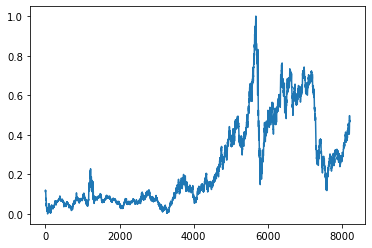

In [28]:
plt.plot(data_oil)

# Split the Data into Train & Test

In [29]:
# independendant and dependant varibles
x_train = []
y_train = []

In [30]:
scaled_training.shape

(8216, 1)

In [31]:
training_size=int(len(data_oil)*0.65)
test_size=len(data_oil)-training_size
train_data,test_data=data_oil[0:training_size,:],data_oil[training_size:len(data_oil),:1]

In [32]:
training_size,test_size

(5340, 2876)

In [33]:
train_data.shape

(5340, 1)

# Creating A Dataset with silding windows

In [34]:
##convert an array of values into a dataset matrix
def create_dataset (dataset,time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [35]:
#reshape into X=t,t 1, t 2, t 3 and Y=t14
time_step = 10
x_train,y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [36]:
print(x_train.shape), print(y_train.shape)

(5329, 10)
(5329,)


(None, None)

In [37]:
print(x_test.shape), print(y_test.shape)

(2865, 10)
(2865,)


(None, None)

In [38]:
x_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

In [39]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test =x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

In [40]:
x_train

array([[[0.11335703],
        [0.11661484],
        [0.12053902],
        ...,
        [0.10980305],
        [0.1089886 ],
        [0.11054346]],

       [[0.11661484],
        [0.12053902],
        [0.11550422],
        ...,
        [0.1089886 ],
        [0.11054346],
        [0.10165852]],

       [[0.12053902],
        [0.11550422],
        [0.1156523 ],
        ...,
        [0.11054346],
        [0.10165852],
        [0.09906708]],

       ...,

       [[0.36731823],
        [0.35176958],
        [0.36080261],
        ...,
        [0.36391234],
        [0.37042796],
        [0.37042796]],

       [[0.35176958],
        [0.36080261],
        [0.35354657],
        ...,
        [0.37042796],
        [0.37042796],
        [0.37879461]],

       [[0.36080261],
        [0.35354657],
        [0.35295424],
        ...,
        [0.37042796],
        [0.37879461],
        [0.37916482]]])

In [42]:
x_test

array([[[0.38005331],
        [0.36872501],
        [0.37324152],
        ...,
        [0.3537687 ],
        [0.35465719],
        [0.3499926 ]],

       [[0.36872501],
        [0.37324152],
        [0.38205242],
        ...,
        [0.35465719],
        [0.3499926 ],
        [0.3465867 ]],

       [[0.37324152],
        [0.38205242],
        [0.38042352],
        ...,
        [0.3499926 ],
        [0.3465867 ],
        [0.34355101]],

       ...,

       [[0.40604176],
        [0.41218718],
        [0.41041019],
        ...,
        [0.46794017],
        [0.47297497],
        [0.47119799]],

       [[0.41218718],
        [0.41041019],
        [0.43513994],
        ...,
        [0.47297497],
        [0.47119799],
        [0.47341922]],

       [[0.41041019],
        [0.43513994],
        [0.4417296 ],
        ...,
        [0.47119799],
        [0.47341922],
        [0.46497853]]])